In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns

import pytelligence as pt

%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 2000

sns.set_theme()

/home/george/Desktop/pytelligence/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Created directory for logs at '/home/george/Desktop/pytelligence/notebooks/logs'


In [3]:
df = pd.read_csv(
    "../data/breast_cancer_cat/breast-cancer.data",
    names=[
        "class",
        "age",
        "menopause",
        "tumor-size",
        "inv-nodes",
        "node-caps",
        "deg-malig",
        "breast",
        "breast-quad",
        "irradiat",
    ],
)
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
# pt.feat_analysis.get_distribution(df)

In [4]:
# sns.jointplot(data=df, x="deg-malig", y="breast", hue="class")

## Training

In [3]:
df.columns

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [4]:
setup, X_sample, y_sample = pt.modelling.prepare_data(
    train_data=df,
    config_path="./config_bc_cat.yml",
)

[I 2022-12-14 12:02:19] %%% PREPARING DATA
[I 2022-12-14 12:02:19] Read ./config_bc_cat.yml: 
 {'modelling': {'target_clf': 'class', 'numeric_cols': ['deg-malig'], 'categorical_cols': ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], 'feature_scaling': True}}
[I 2022-12-14 12:02:19] Created preprocessing pipeline with following steps: ['scaler', 'ohe']
/home/george/Desktop/pytelligence/pytelligence/modelling/_internals/_prep_pipeline.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, self.numeric_cols] = self.scaler.transform(X.loc[:, self.numeric_cols])
[I 2022-12-14 12:02:19] Applied preprocessing transformations
[I 2022-12-14 12:02:19] Encoded target variable using classes: [(0, 'no-r

In [5]:
X_sample

,deg-malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,tumor-size_0-4,tumor-size_10-14,tumor-size_15-19,tumor-size_20-24,tumor-size_25-29,tumor-size_30-34,tumor-size_35-39,tumor-size_40-44,tumor-size_45-49,tumor-size_5-9,tumor-size_50-54,inv-nodes_0-2,inv-nodes_12-14,inv-nodes_15-17,inv-nodes_24-26,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,node-caps_?,node-caps_no,node-caps_yes,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,1.290564,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,-0.066426,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
2,-0.066426,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,-0.066426,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
4,-0.066426,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0


In [6]:
compare_df, algo_list, model_list = pt.modelling.compare_algorithms(
    setup=setup,
    include=[
        "lr",
        # "dt",
        # "rf",
        # "ridge",
        # "perceptron",
        # "passive-aggressive",
        # "extratree",
        # "extratrees",
        # "knn",
        "nb",
        # "linearsvc",
        # "rbfsvc",
    ],
    sort="f1",
    return_models=True,
)
compare_df

[I 2022-12-14 12:02:27] %%% COMPARING ALGORITHMS
[I 2022-12-14 12:02:27] Evaluating lr...
[I 2022-12-14 12:02:35] Evaluating nb...


,algorithm,accuracy,precision,recall,f1,roc_auc,Fit time (s)
0,nb,0.553,0.448,0.835,0.553,0.659,0.021
1,lr,0.682,0.532,0.341,0.345,0.654,0.066


In [7]:
le = setup.y_clf_encoder
preds = model_list[-1].predict(X_sample)
le.inverse_transform(preds)

array(['recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events'], dtype=object)

In [8]:
print(*[(i, class_) for i, class_ in enumerate(le.classes_)])

(0, 'no-recurrence-events') (1, 'recurrence-events')


In [9]:
compare_df_tune, model_list, opt_history_dict = (
        pt.modelling.tune_hyperparams(
               setup=setup,
               include=["lr", "nb"],
               optimize="f1",
               n_trials=10,
               return_models=True,
        )
)
compare_df_tune

[I 2022-12-14 12:03:33] %%% TUNING HYPERPARAMETERS
[I 2022-12-14 12:03:33] Algorithms: ['lr', 'nb']
[I 2022-12-14 12:03:33] Metric: f1
[I 2022-12-14 12:03:33] Trials per algorithm: 10
[I 2022-12-14 12:03:34] Trial 0 finished with value: 0.3798 and parameters: {'C': 4.0950603361862665, 'l1_ratio': 0.9258546576604483}. Best is trial 0 with value: 0.3798
[I 2022-12-14 12:03:34] Trial 1 finished with value: 0.3673 and parameters: {'C': 0.9937466218060316, 'l1_ratio': 0.26889700486840384}. Best is trial 0 with value: 0.3798
[I 2022-12-14 12:03:35] Trial 2 finished with value: 0.3798 and parameters: {'C': 3.9015490284384367, 'l1_ratio': 0.9900610278953358}. Best is trial 0 with value: 0.3798
[I 2022-12-14 12:03:35] Trial 3 finished with value: 0.0000 and parameters: {'C': 4.195437313105554e-06, 'l1_ratio': 0.18038479173728095}. Best is trial 0 with value: 0.3798
[I 2022-12-14 12:03:36] Trial 4 finished with value: 0.0000 and parameters: {'C': 4.7593988227025415e-05, 'l1_ratio': 0.77016610823

,algorithm,accuracy,precision,recall,f1,roc_auc,Fit time (s),hyperparams
0,nb,0.577,0.460,0.812,0.56,0.655,0.018,"{'priors': None, 'var_smoothing': 1.2877985440..."
1,lr,0.664,0.564,0.353,0.38,0.609,0.432,"{'C': 4.0950603361862665, 'class_weight': None..."


In [10]:
opt_history_dict["nb"].show()

[I 2022-12-14 12:04:18] %%% REDUCING FEATURE SPACE
[I 2022-12-14 12:04:18] Algorithm selected for feature space reduction: nb
[I 2022-12-14 12:04:18] Metric to optimize for: f1
[I 2022-12-14 12:04:18] Acceptable loss ratio: 0.99
[I 2022-12-14 12:04:18] Reference metric: 0.560
[I 2022-12-14 12:04:18] Minimum acceptable metric: 0.99 * 0.560 = 0.554
[I 2022-12-14 12:04:23] Feature count: 40, metric: 0.571 (new best), removing worst feature: breast-quad_right_up
[I 2022-12-14 12:04:27] Feature count: 39, metric: 0.578 (new best), removing worst feature: tumor-size_40-44
[I 2022-12-14 12:04:31] Feature count: 38, metric: 0.582 (new best), removing worst feature: breast-quad_central
[I 2022-12-14 12:04:36] Feature count: 37, metric: 0.590 (new best), removing worst feature: tumor-size_15-19
[I 2022-12-14 12:04:40] Feature count: 36, metric: 0.592 (new best), removing worst feature: age_40-49
[I 2022-12-14 12:04:44] Feature count: 35, metric: 0.592, removing worst feature: age_60-69
[I 2022-1

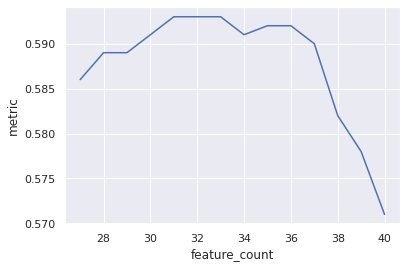

In [11]:
best_feature_list, metric_feature_df = pt.modelling.reduce_feature_space(
    setup=setup,
    algorithm= "nb",
    metric="f1",
    reference_metric=compare_df_tune.iloc[0]["f1"],
    acceptable_loss=0.99,
    hyperparams=compare_df_tune.iloc[0]["hyperparams"]
)

In [12]:
compare_df_final, model_list, opt_history_dict = (
        pt.modelling.tune_hyperparams(
               setup=setup,
               include=["nb", "lr"],
               optimize="f1",
               n_trials=20,
               feature_list=best_feature_list,
               return_models=True,
        )
)
compare_df_final

[I 2022-12-14 12:05:22] %%% TUNING HYPERPARAMETERS
[I 2022-12-14 12:05:22] Algorithms: ['nb', 'lr']
[I 2022-12-14 12:05:22] Metric: f1
[I 2022-12-14 12:05:22] Trials per algorithm: 20
[I 2022-12-14 12:05:22] Trial 0 finished with value: 0.5818 and parameters: {'var_smoothing': 3.1682537232046905e-07}. Best is trial 0 with value: 0.5818
[I 2022-12-14 12:05:22] Trial 1 finished with value: 0.4588 and parameters: {'var_smoothing': 0.00010163121952395116}. Best is trial 0 with value: 0.5818
[I 2022-12-14 12:05:23] Trial 2 finished with value: 0.5633 and parameters: {'var_smoothing': 2.0414889699491233e-05}. Best is trial 0 with value: 0.5818
[I 2022-12-14 12:05:23] Trial 3 finished with value: 0.5651 and parameters: {'var_smoothing': 1.5411609542350935e-05}. Best is trial 0 with value: 0.5818
[I 2022-12-14 12:05:23] Trial 4 finished with value: 0.5780 and parameters: {'var_smoothing': 4.0833261251023534e-08}. Best is trial 0 with value: 0.5818
[I 2022-12-14 12:05:23] Trial 5 finished with 

,algorithm,accuracy,precision,recall,f1,roc_auc,Fit time (s),hyperparams
0,nb,0.599,0.501,0.859,0.593,0.658,0.020,"{'priors': None, 'var_smoothing': 1.3989258947..."
1,lr,0.682,0.545,0.329,0.352,0.627,0.153,"{'C': 3.9047401417868413, 'class_weight': None..."


In [13]:
setup.prep_pipe

Pipeline(steps=[('scaler', CustomStandardScaler(numeric_cols=['deg-malig'])),
                ('ohe', OHE())])

In [14]:
pt.modelling.export_model(
        setup=setup,
        model=model_list[0],
        target_dir="./",
    )

[I 2022-12-14 12:06:05] Exported modelling pipeline to 'model_2022-12-14_nb_#1.joblib'
